In [2]:
import glob
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 1

/home/vedu_x/miniconda3/envs/DataScience/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
sns.set(rc={'figure.figsize':(11, 4)})


In [4]:
files = "data/cleaned_data"


df = pd.read_csv(files+"/2020-01-21mod.csv.gz")

#print(data_files)
df.head()

,CreatedAt,CreatedAt_Full,Epoch_Time,TweetID,UserID,Handle,Followers,Friends,Hashtags,Retweeted,Retweeted_ID,Text,Year,month,day,date
0,2020-01-21,Tue Jan 21 22:45:27 +0000 2020,1.579665e+09,1219752899636613121,1110906564158869505,Huerconetzin,406,1982,'coronavirus',YES,1.865051e+07,RT @AnneKPIX: @CDC has activated its emergency...,2020,1,21,2020-01-21 22:45:27
1,2020-01-21,Tue Jan 21 22:49:17 +0000 2020,1.579665e+09,1219753863940648965,2252416118,Paxman42,400,1286,'lungcancer',YES,7.865932e+17,RT @OurWarOnCancer: Where is our FEDERAL vacci...,2020,1,21,2020-01-21 22:49:17
2,2020-01-21,Tue Jan 21 22:54:57 +0000 2020,1.579665e+09,1219755288988798981,738000529775697920,beerhowell,67,470,NaN,YES,8.070950e+05,RT @nytimes: Breaking News: The first U.S. cas...,2020,1,21,2020-01-21 22:54:57
3,2020-01-21,Tue Jan 21 22:18:51 +0000 2020,1.579663e+09,1219746203652456448,969776806860476416,FREEDANON17,3712,2172,NaN,YES,5.867623e+08,RT @ScottAnthonyUSA: ⚠️ IT SHOULD BE NOTED tha...,2020,1,21,2020-01-21 22:18:51
4,2020-01-21,Tue Jan 21 22:47:01 +0000 2020,1.579665e+09,1219753292571594754,33833239,IAmTonyaNash,3954,4953,'publichealth',YES,1.465700e+08,RT @CDCgov: PHAP gives future #publichealth pr...,2020,1,21,2020-01-21 22:47:01


In [5]:
data_files = glob.glob(files+"/*.csv.gz")
print(data_files)

['data/cleaned_data/2020-03-27mod.csv.gz', 'data/cleaned_data/2020-03-21mod.csv.gz', 'data/cleaned_data/2020-02-22mod.csv.gz', 'data/cleaned_data/2020-03-03mod.csv.gz', 'data/cleaned_data/2020-03-01mod.csv.gz', 'data/cleaned_data/2020-02-17mod.csv.gz', 'data/cleaned_data/2020-03-09mod.csv.gz', 'data/cleaned_data/2020-01-25mod.csv.gz', 'data/cleaned_data/2020-03-06mod.csv.gz', 'data/cleaned_data/2020-01-21mod.csv.gz', 'data/cleaned_data/2020-03-30mod.csv.gz', 'data/cleaned_data/2020-03-12mod.csv.gz', 'data/cleaned_data/2020-02-14mod.csv.gz', 'data/cleaned_data/2020-03-17mod.csv.gz', 'data/cleaned_data/2020-03-08mod.csv.gz', 'data/cleaned_data/2020-01-26mod.csv.gz', 'data/cleaned_data/2020-02-24mod.csv.gz', 'data/cleaned_data/2020-02-20mod.csv.gz', 'data/cleaned_data/2020-02-16mod.csv.gz', 'data/cleaned_data/2020-01-31mod.csv.gz', 'data/cleaned_data/2020-02-12mod.csv.gz', 'data/cleaned_data/2020-02-19mod.csv.gz', 'data/cleaned_data/2020-02-06mod.csv.gz', 'data/cleaned_data/2020-03-28mod.

In [6]:
reqCols = ['TweetID', 'CreatedAt', 'CreatedAt_Full','Hashtags', 'date', 'Year', 'month', 'day']

In [ ]:
df = pd.concat((pd.read_csv(file,usecols=reqCols, engine='python') for file in data_files), ignore_index=True)
#data for 21-01-2020
df.head()


In [7]:
#changing the index to date
#df = df.set_index('CreatedAt')

# df['Date'] = df['CreatedAt']
df.head()

,CreatedAt,CreatedAt_Full,TweetID,Hashtags,Date
0,2020-03-18,Wed Mar 18 00:00:00 +0000 2020,1240065380061716482,NaN,2020-03-18
1,2020-03-18,Wed Mar 18 00:00:00 +0000 2020,1240065380065796096,NaN,2020-03-18
2,2020-03-18,Wed Mar 18 00:00:00 +0000 2020,1240065380078325760,'COVID19',2020-03-18
3,2020-03-18,Wed Mar 18 00:00:00 +0000 2020,1240065380095123458,"'Tribuna', 'QuédateEnCasa', 'SLRC', 'COVID19',...",2020-03-18
4,2020-03-18,Wed Mar 18 00:00:00 +0000 2020,1240065380204322818,"'Europa', 'Auto', 'Industria', 'Empresas', 'In...",2020-03-18


In [8]:
# df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

df.date = pd.to_datetime(df.date)
#drop NA hashtag values for the analysis of first part of research
# df['Year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.day

In [ ]:
df.dropna(subset=['Hashtags'], inplace=True)

In [43]:
# df = df.assign(Hashtags=df.Hashtags.str.split(",")).explode('Hashtags')
# df.Hashtags = df.Hashtags.str.lower()
# time = df.CreatedAt_Full.str.split(' ')
# time.head()
# df['date'] = df['CreatedAt'] + " "+ time.apply(lambda x:x[3])


KeyboardInterrupt: 

In [38]:
#df['CreatedAt'].plot(linewidth=0.5)
counts = df.groupby(['Date']).agg(len)
counts



,CreatedAt,CreatedAt_Full,TweetID,Hashtags,Year,month,day
Date,,,,,,,
2020-01-21,57,57,57,57,57,57,57
2020-01-22,10764,10764,10764,10764,10764,10764,10764
2020-01-23,51895,51895,51895,51895,51895,51895,51895
2020-01-24,187227,187227,187227,187227,187227,187227,187227
2020-01-25,255648,255648,255648,255648,255648,255648,255648
...,...,...,...,...,...,...,...
2020-03-27,205195,205195,205195,205195,205195,205195,205195
2020-03-28,195738,195738,195738,195738,195738,195738,195738
2020-03-29,183454,183454,183454,183454,183454,183454,183454


In [39]:
counts.rename(columns = {'CreatedAt_Full':'noOfHashtags'}, inplace = True)
counts.drop(columns=['TweetID', 'Hashtags', 'Year', 'month', 'day'], inplace=True)


In [40]:
counts.tail()

,CreatedAt,noOfHashtags
Date,,
2020-03-27,205195,205195
2020-03-28,195738,195738
2020-03-29,183454,183454
2020-03-30,198208,198208
2020-03-31,206104,206104


In [17]:
counts.head()

,CreatedAt,noOfHashtags
Date,,
2020-01-21,57,57
2020-01-22,10764,10764
2020-01-23,51895,51895
2020-01-24,187227,187227
2020-01-25,255648,255648


NameError: name 'ThreeMonthDays' is not defined

In [ ]:
#noOfHash = counts['noOfHashtags'].tolist()
#noOfHash

In [ ]:
#counts.loc["2020-03-01"].index
pd.to_datetime("2020-03-01", format='%Y-%m-%d')

#counts.index

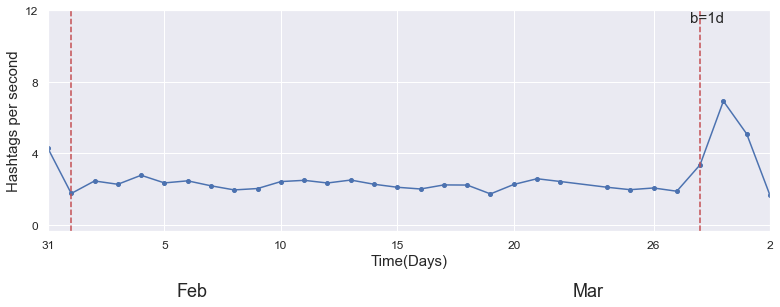

In [41]:
#ThreeMonthDays = list(range(21, 31+1))+list(range(1, 28+1))+ list(range(1, 31+1))

#to find number of hashtags per second
plt.plot(counts['noOfHashtags'].div(60*60*24), "o-", markersize=4)
plt.ylabel('Hashtags per second', fontsize=15)
plt.xlabel('Time(Days)', fontsize=15)

plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 14, 4), fontsize = 12)
plt.xticks(counts.index[::5], counts.index.day[::5], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image4.png')
plt.show()
#Tokens per Day

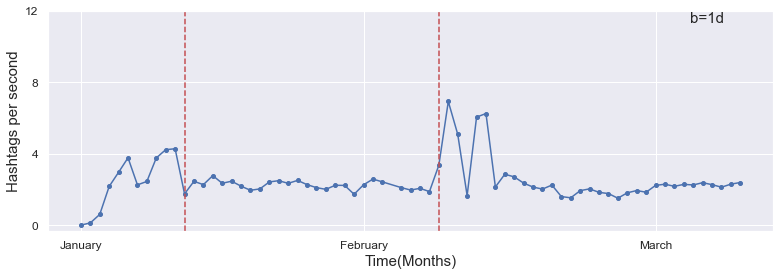

In [33]:
#ThreeMonthDays = list(range(21, 31+1))+list(range(1, 28+1))+ list(range(1, 31+1))

#to find number of hashtags per second
plt.plot(counts['noOfHashtags'].div(60*60*24), "o-", markersize=4)
plt.ylabel('Hashtags per second', fontsize=15)
plt.xlabel('Time(Months)', fontsize=15)


plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 14, 4), fontsize = 12)
plt.xticks(counts.index[::30], counts.index.month_name()[::30], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
#plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image3.png')
plt.show()

In [21]:
counts.head()

TokensPerDay = df.groupby(['Date'])['Hashtags'].nunique()
#type of tokens per day

TokensPerDay.head()

Date
2020-01-21       27
2020-01-22     1774
2020-01-23     6353
2020-01-24    13916
2020-01-25    15235
Name: Hashtags, dtype: int64

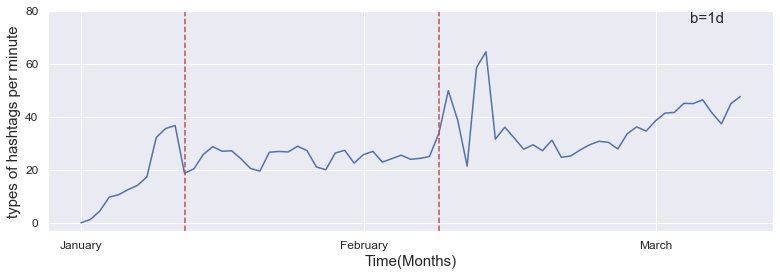

In [35]:
plt.plot(TokensPerDay.div(60*24))
plt.ylabel('types of hashtags per minute', fontsize=15)
plt.xlabel('Time(Months)', fontsize=15)

plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 100, 20), fontsize = 12)
plt.xticks(TokensPerDay.index[::30], TokensPerDay.index.month_name()[::30], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
#plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image2.png')
plt.show()
#draw the plot
#Tokens per Day

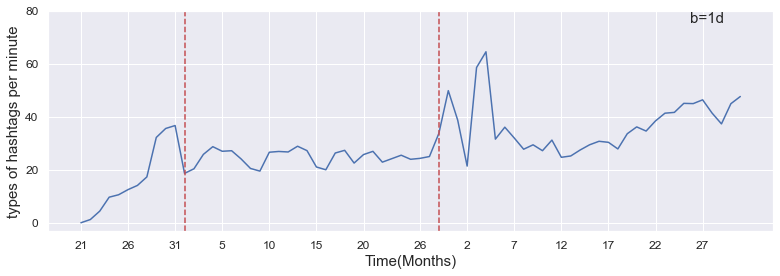

In [24]:
plt.plot(TokensPerDay.div(60*24))
plt.ylabel('types of hashtags per minute', fontsize=15)
plt.xlabel('Time(Months)', fontsize=15)

plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 100, 20), fontsize = 12)
plt.xticks(TokensPerDay.index[::5], TokensPerDay.index.day[::5], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
#plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image1.png')
plt.show()
#draw the plot
#Tokens per Day

In [ ]:
###zoom into week for hourly analysis



df.head()





In [ ]:
df['TweetID'] = df['TweetID'].astype(int)

In [ ]:
#checking the occurence of different tweets

df.groupby([df.index.date, 'TweetID']).count().plot()

plt.ylabel('Number of Tweets')
#draw the plot
plt.show()

In [ ]:
# df.index
# df['Year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.day
# df.head()

In [ ]:
# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()
    

In [ ]:
# df['TweetID'].plot()

In [ ]:
#plot_df(df, x=df.day, title='Daily tweets')

In [ ]:
# counts = df.groupby(['date']).agg(len)

#Tokens per Day


In [ ]:
# plt.plot(counts)
# plt.ylabel('Number of Tweets')
# plt.xlabel('day')
# #draw the plot
# plt.show()
#Tweets per second plotted against day

In [ ]:
# plt.plot(df.groupby(['Date']).agg(len))
# plt.ylabel('Number of Tweets')
# plt.xlabel('day')
# #draw the plot
# plt.show()

In [ ]:
# plt.plot(df.groupby(['month']).agg(len))
# plt.ylabel('Number of Tweets')
# plt.xlabel('month')
# #draw the plot
# plt.show()
#weird result as i have data for one month but still weird as it should have some kind of dot for that month




In [ ]:
# counts1 = df.groupby(['day', 'Retweeted_ID']).size().plot()

# default_x_ticks =df['day']
# plt.xticks(default_x_ticks)
# plt.show()

#What kind of plot to use to talk about frequency of different type of tweets?
#i can use subplot or maybe legend

In [ ]:
# df.assign(Hashtags=df.Hashtags.str.split(",")).explode('Hashtags')